In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [210]:
rdf = pd.read_json("downloaded-logs-20210216-181303.json")
df = pd.io.json.json_normalize(rdf["jsonPayload"])
df["NodeName"] = pd.io.json.json_normalize(rdf['labels'])["compute.googleapis.com/resource_name"]
df["image.TotalPrep"] = df["image.TotalPrep"] / 1000**3
df["LayerCount"] = [ len(pd.io.json.json_normalize(l)["ID"]) if l is not None else 0 for l in df["image.Layer"] ]

<ipython-input-210-cc64ec48b121>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(rdf["jsonPayload"])
<ipython-input-210-cc64ec48b121>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df["NodeName"] = pd.io.json.json_normalize(rdf['labels'])["compute.googleapis.com/resource_name"]
<ipython-input-210-cc64ec48b121>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df["LayerCount"] = [ len(pd.io.json.json_normalize(l)["ID"]) if l is not None else 0 for l in df["image.Layer"] ]


In [211]:
len(df[df["image.TotalPrep"] == 0]) / len(df)

0.5701906412478336

## First Plots per node

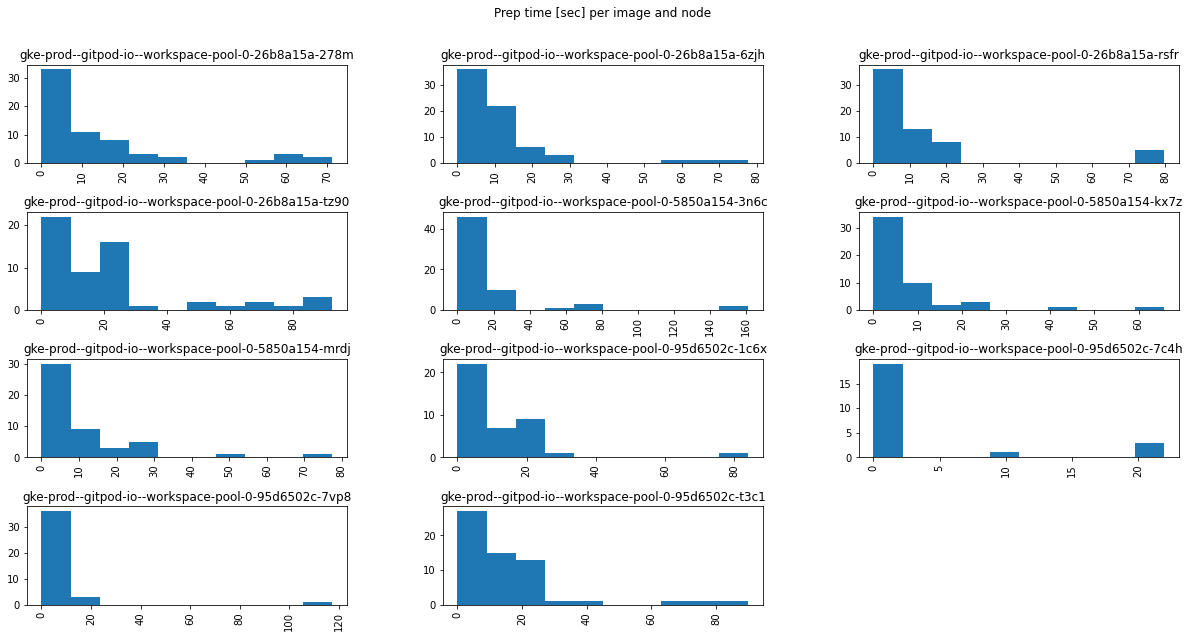

In [212]:
df['image.TotalPrep'].hist(by=df["NodeName"], figsize=(20, 10))
plt.suptitle("Prep time [sec] per image and node");

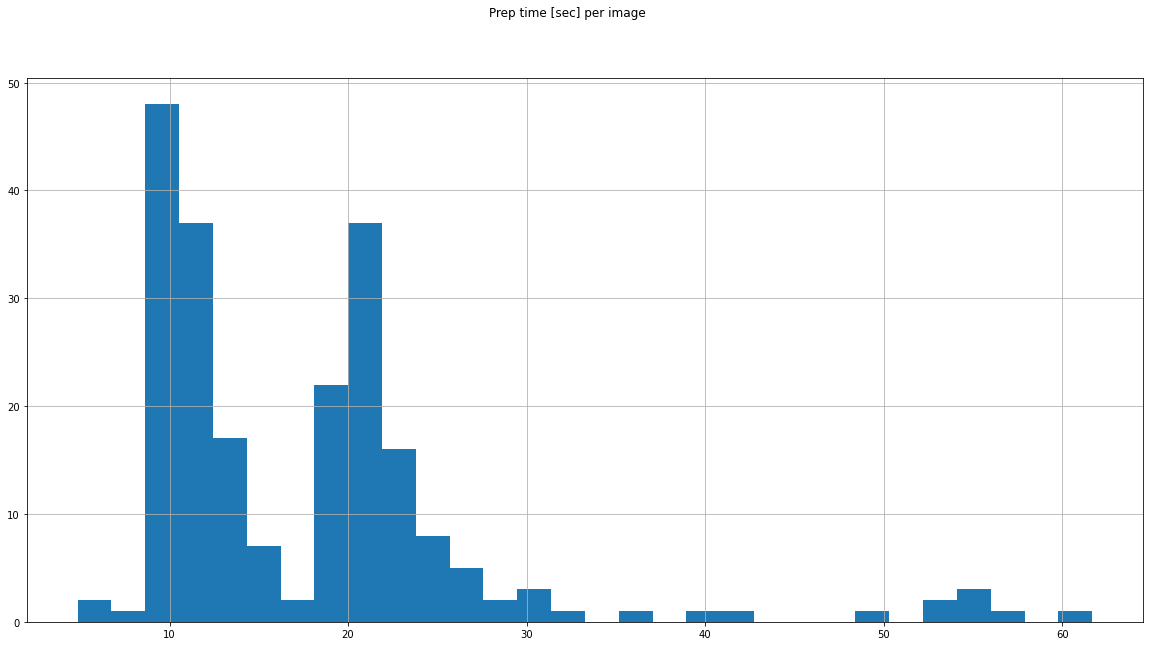

In [219]:
df['image.TotalPrep'][(df['image.TotalPrep'] < df['image.TotalPrep'].quantile(0.95)) & (df['image.TotalPrep'] > 0)].hist(bins=30, figsize=(20, 10))
plt.suptitle("Prep time [sec] per image");

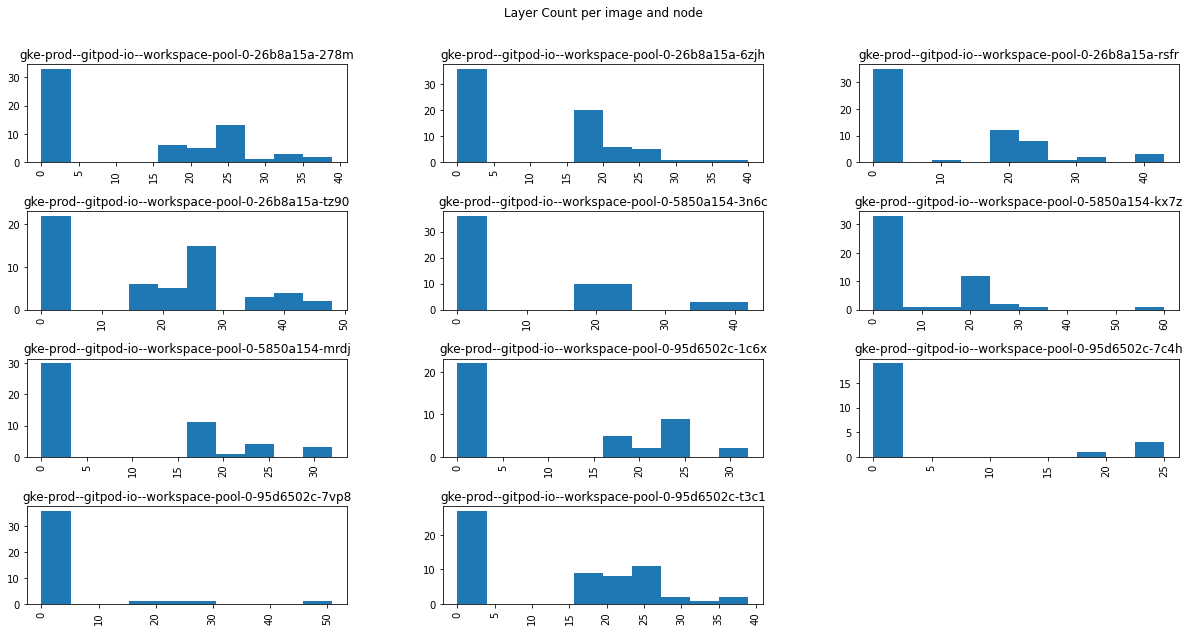

In [144]:
df['LayerCount'].hist(by=df["NodeName"], figsize=(20, 10))
plt.suptitle("Layer Count per image and node");

## Layer Counts

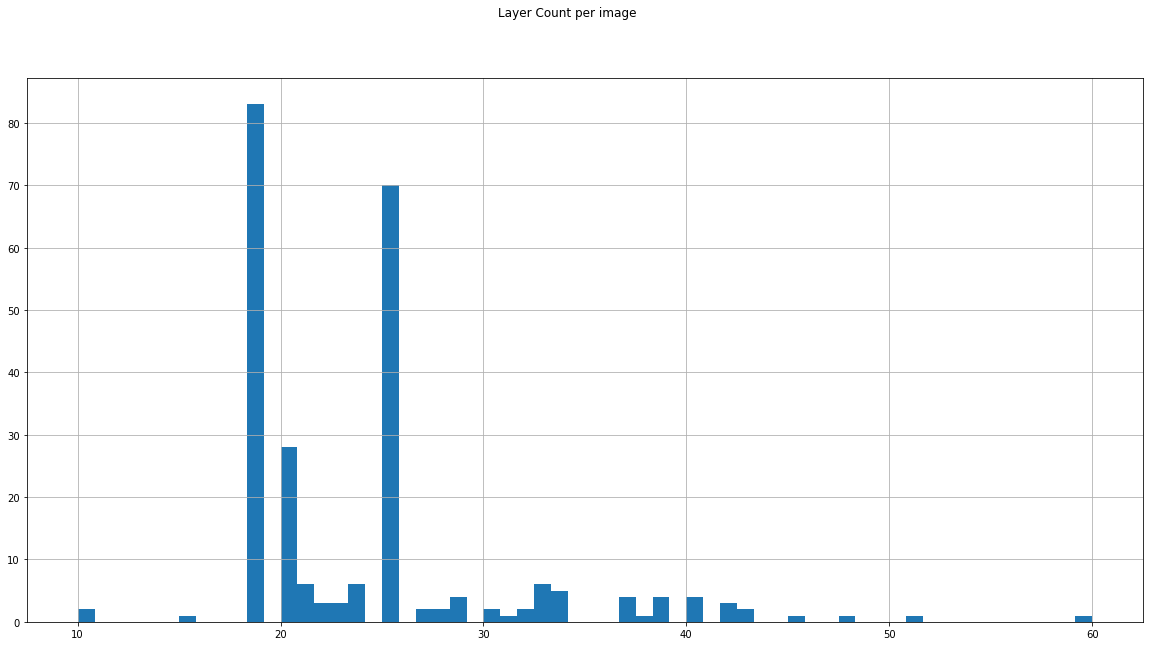

In [174]:
df['LayerCount'][df['LayerCount'] > 0].hist(figsize=(20, 10), bins=60)
plt.suptitle("Layer Count per image");

In [184]:
df[df['LayerCount'] > 0].groupby('LayerCount').count()

,message,level,instanceId,id,initialPrep,serviceContext.service,serviceContext.version,image.Name,image.TotalPrep,image.Layer,NodeName
LayerCount,,,,,,,,,,,
10,2,2,2,2,2,2,2,2,2,2,2
15,1,1,1,1,1,1,1,1,1,1,1
19,83,83,83,83,83,83,83,83,83,83,83
20,28,28,28,28,28,28,28,28,28,28,28
21,6,6,6,6,6,6,6,6,6,6,6
22,3,3,3,3,3,3,3,3,3,3,3
23,3,3,3,3,3,3,3,3,3,3,3
24,6,6,6,6,6,6,6,6,6,6,6
25,70,70,70,70,70,70,70,70,70,70,70


## Layer Re-Prep (per node)

In [145]:
withLayer = df[df["image.Layer"].notnull()]

rows = []
for idx, l in withLayer.iterrows():
    nl = pd.io.json.json_normalize(l["image.Layer"])
    for idx, row in nl.iterrows():
        rows.append({'prep': row['Prep']/1000**3, 'id': row['ID'], 'node': l['NodeName']})

layer = pd.DataFrame(rows)
layer

<ipython-input-145-1491c5518861>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nl = pd.io.json.json_normalize(l["image.Layer"])


,prep,id,node
0,2.445191,sha256:1f7faffab27ee50d154a814af35148bff6a2e65...,gke-prod--gitpod-io--workspace-pool-0-26b8a15a...
1,9.484741,sha256:c500b3efde7d70b48d1f9fbcd498ec6e8cf46d7...,gke-prod--gitpod-io--workspace-pool-0-26b8a15a...
2,0.086707,sha256:0e26cfafbc86fb9394fcb228e65f119f2457986...,gke-prod--gitpod-io--workspace-pool-0-26b8a15a...
3,0.008460,sha256:81cd114c583abcbb14e09a543f128ef3e66e57d...,gke-prod--gitpod-io--workspace-pool-0-26b8a15a...
4,0.008366,sha256:98b9782f64e97dae657c98fdb057b8b8f5091e2...,gke-prod--gitpod-io--workspace-pool-0-26b8a15a...
...,...,...,...
5989,0.024693,sha256:4d2f7d9b3aca43b7892e51686f18181392e23fb...,gke-prod--gitpod-io--workspace-pool-0-5850a154...
5990,0.041040,sha256:19ce763f7ca4abe9457645f52753e83a1d30fc9...,gke-prod--gitpod-io--workspace-pool-0-5850a154...
5991,0.014197,sha256:03dc055174793bd6e21292aa8ed4cee6c0a3d27...,gke-prod--gitpod-io--workspace-pool-0-5850a154...
5992,0.096253,sha256:36cc40a3c787fa4c4aa3c7d029591ef48f97169...,gke-prod--gitpod-io--workspace-pool-0-5850a154...


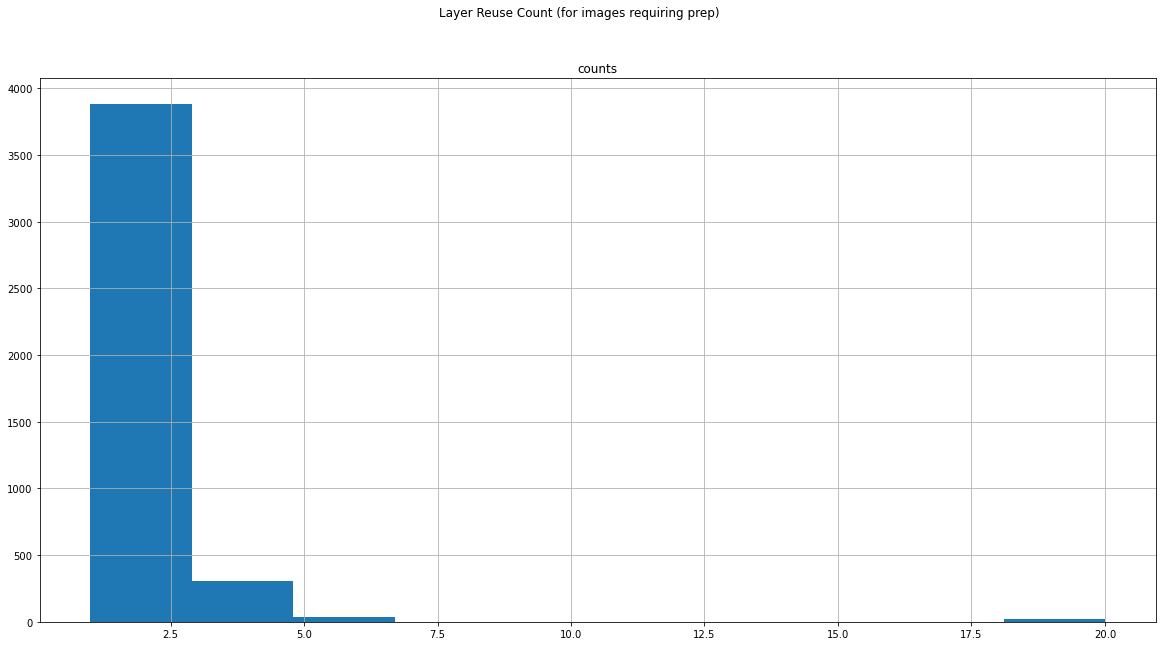

In [160]:
layer.groupby(['id']).size().reset_index(name='counts').sort_values(['counts'], ascending=False).hist(figsize=(20,10))
plt.suptitle("Layer Reuse Count (for images requiring prep)");

In [165]:
sl = layer.groupby(['id']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
sum(sl['counts'] == 1)

3337

## Prep times

In [209]:
layer['prep'][(layer['prep'] < layer['prep'].quantile(0.95)) & (layer['prep'] > 0)].describe()

count    5694.000000
mean        0.513279
std         1.443121
min         0.002514
25%         0.011728
50%         0.041907
75%         0.116123
max         7.655734
Name: prep, dtype: float64